In [1]:
# Minneapolis

In [63]:
import pandas as pd
import censusdata
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.formula.api as smf

In [64]:
data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '27'),
                                 ('county', '053'),
                                 ('block group', '*')]),
          ['B25064_001E'])

data.head()

B25064_001E
Block Group 2, Census Tract 1100, Hennepin Coun...          NaN
Block Group 2, Census Tract 85, Hennepin County...     1.00e+03
Block Group 3, Census Tract 110, Hennepin Count...    -6.67e+08
Block Group 1, Census Tract 265.14, Hennepin Co...     1.09e+03
Block Group 3, Census Tract 236, Hennepin Count...    -6.67e+08

In [65]:
index = data.index
a_list = list(index)

d = {'COUNTYFP': [], 'TRACTCE': [], 'state': [], 'Cash_Rent' :[], 'NAMELSAD': []}


for value in a_list: 
    block_group = value.params()[3][1]
    
    if block_group == '1':   
        d['NAMELSAD'].append('Block Group 1')
    elif block_group == '2':   
        d['NAMELSAD'].append('Block Group 2')
    elif block_group == '3':   
        d['NAMELSAD'].append('Block Group 3')
    elif block_group == '4':   
        d['NAMELSAD'].append('Block Group 4')
    elif block_group == '5':   
        d['NAMELSAD'].append('Block Group 5')
    elif block_group == '6':   
        d['NAMELSAD'].append('Block Group 6')
    elif block_group == '7':   
        d['NAMELSAD'].append('Block Group 7')
    elif block_group == '8':   
        d['NAMELSAD'].append('Block Group 8')
    else:   
        d['NAMELSAD'].append(np.nan)
    
    d['COUNTYFP'].append(value.params()[1][1])
    d['state'].append(value.params()[0][1])
    d['TRACTCE'].append(value.params()[2][1])
    
    
for value in data['B25064_001E']: 
    if pd.isnull(value): 
        value = 0
    if not isinstance(value, float) or value <= 0: 
        value = 0
    d['Cash_Rent'].append(int(value))

    
df2 = pd.DataFrame.from_dict(d, dtype=int)

C:\Users\wcoop\anaconda3\lib\site-packages\numpy\core\numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [66]:
data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '27'),
                                 ('county', '053'),
                                 ('block group', '*')]),
          ['B25077_001E'])

index = data.index
a_list = list(index)

d = {'COUNTYFP': [], 'TRACTCE': [], 'state': [], 'Median_Value__Owner_Occupied' :[], 'NAMELSAD': []}


for value in a_list: 
    block_group = value.params()[3][1]
    if block_group == '1':   
        d['NAMELSAD'].append('Block Group 1')
    elif block_group == '2':   
        d['NAMELSAD'].append('Block Group 2')
    elif block_group == '3':   
        d['NAMELSAD'].append('Block Group 3')
    elif block_group == '4':   
        d['NAMELSAD'].append('Block Group 4')
    elif block_group == '5':   
        d['NAMELSAD'].append('Block Group 5')
    elif block_group == '6':   
        d['NAMELSAD'].append('Block Group 6')
    elif block_group == '7':   
        d['NAMELSAD'].append('Block Group 7')
    elif block_group == '8':   
        d['NAMELSAD'].append('Block Group 8')
    else:   
        d['NAMELSAD'].append(np.nan)
    
    d['COUNTYFP'].append(value.params()[1][1])
    d['state'].append(value.params()[0][1])
    d['TRACTCE'].append(value.params()[2][1])

    
for value in data['B25077_001E']: 
    if pd.isnull(value): 
        value = 0
    if not isinstance(value, float) or value <= 0: 
        value = 0
    d['Median_Value__Owner_Occupied'].append(int(value))
    
df3 = pd.DataFrame.from_dict(d, dtype=int)



In [67]:
path = "./Data/tl_2015_27_bg.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")
county_id = '053'
df = df.query(f'COUNTYFP == "{county_id}"')

# df.plot(figsize=(20,20), edgecolor="purple", facecolor="None")


# new_floats = [25] * len(df["TRACTCE"])
df["TRACTCE"] = df["TRACTCE"].astype(int)
df["NAMELSAD"] = df["NAMELSAD"].astype(str)

df = pd.merge(df, df2, how="left", on=["TRACTCE", "NAMELSAD"])
df = pd.merge(df, df3, how="left", on=["TRACTCE", "NAMELSAD"])

df.head()

C:\Users\wcoop\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\wcoop\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out
C:\Users\wcoop\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\wcoop\anaconda3\lib\site-p

STATEFP COUNTYFP_x  TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON                                           geometry  COUNTYFP_y  state_x  Cash_Rent  COUNTYFP  state_y  Median_Value__Owner_Occupied
0      27        053    22400        4  270530224004  Block Group 4  G5030        S   554691       0  +44.9529131  -093.3762645  POLYGON ((-93.38333 44.95441, -93.38206 44.954...          53       27        829        53       27                        197300
1      27        053   100800        1  270531008001  Block Group 1  G5030        S   301453       0  +45.0213140  -093.3000213  POLYGON ((-93.30322 45.02405, -93.30193 45.024...          53       27       1292        53       27                        130600
2      27        053   100800        2  270531008002  Block Group 2  G5030        S   300970       0  +45.0158933  -093.3000209  POLYGON ((-93.30319 45.01862, -93.30191 45.018...          53       27       1169        53       27                        102100
3      27        053   110800        2  270531108002  Block Group 2  G5030        S   230416       0  +44.9178316  -093.2782206  POLYGON ((-93.28185 44.91780, -93.28184 44.919...          53       27       1044        53       27                        222000
4      27        053    23902        1  270530239021  Block Group 1  G5030        S  2878137  101401  +44.8659402  -093.3861371  POLYGON ((-93.39877 44.86206, -93.39875 44.862...          53       27          0        53       27                        673200

In [68]:
colslist = ["GEOID", "LST_means"]
temp_data = pd.read_csv("./Data/2010_2020_Minneapolis_summer_lst.csv", usecols=colslist)

temp_data["GEOID"] = temp_data["GEOID"].astype(str)
# temp_data["GEOID"] = ["0" + temp for temp in temp_data["GEOID"]]
df["GEOID"] = df["GEOID"].astype(str)


# tracts = []
# for value in temp_data['GEOID']: 
#     tracts.append(value)

# tracts2 = []
# for value in df['GEOID']: 
#     tracts2.append(value)

# print(len(list(set(tracts2) - set(tracts))))

df4 = pd.merge(df, temp_data, how="left", on=["GEOID"])


print(max(df4["Median_Value__Owner_Occupied"]))

965800


In [69]:
for index, row in df4.iterrows():
    if float(row['INTPTLON']) <= -93.4 or float(row['INTPTLON']) >= -92.35:
        df4 = df4.drop(index)
    elif float(row['INTPTLAT']) <= 44.85 or float(row['INTPTLAT']) >= 45.10:
        df4 = df4.drop(index)

C:\Users\wcoop\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\wcoop\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


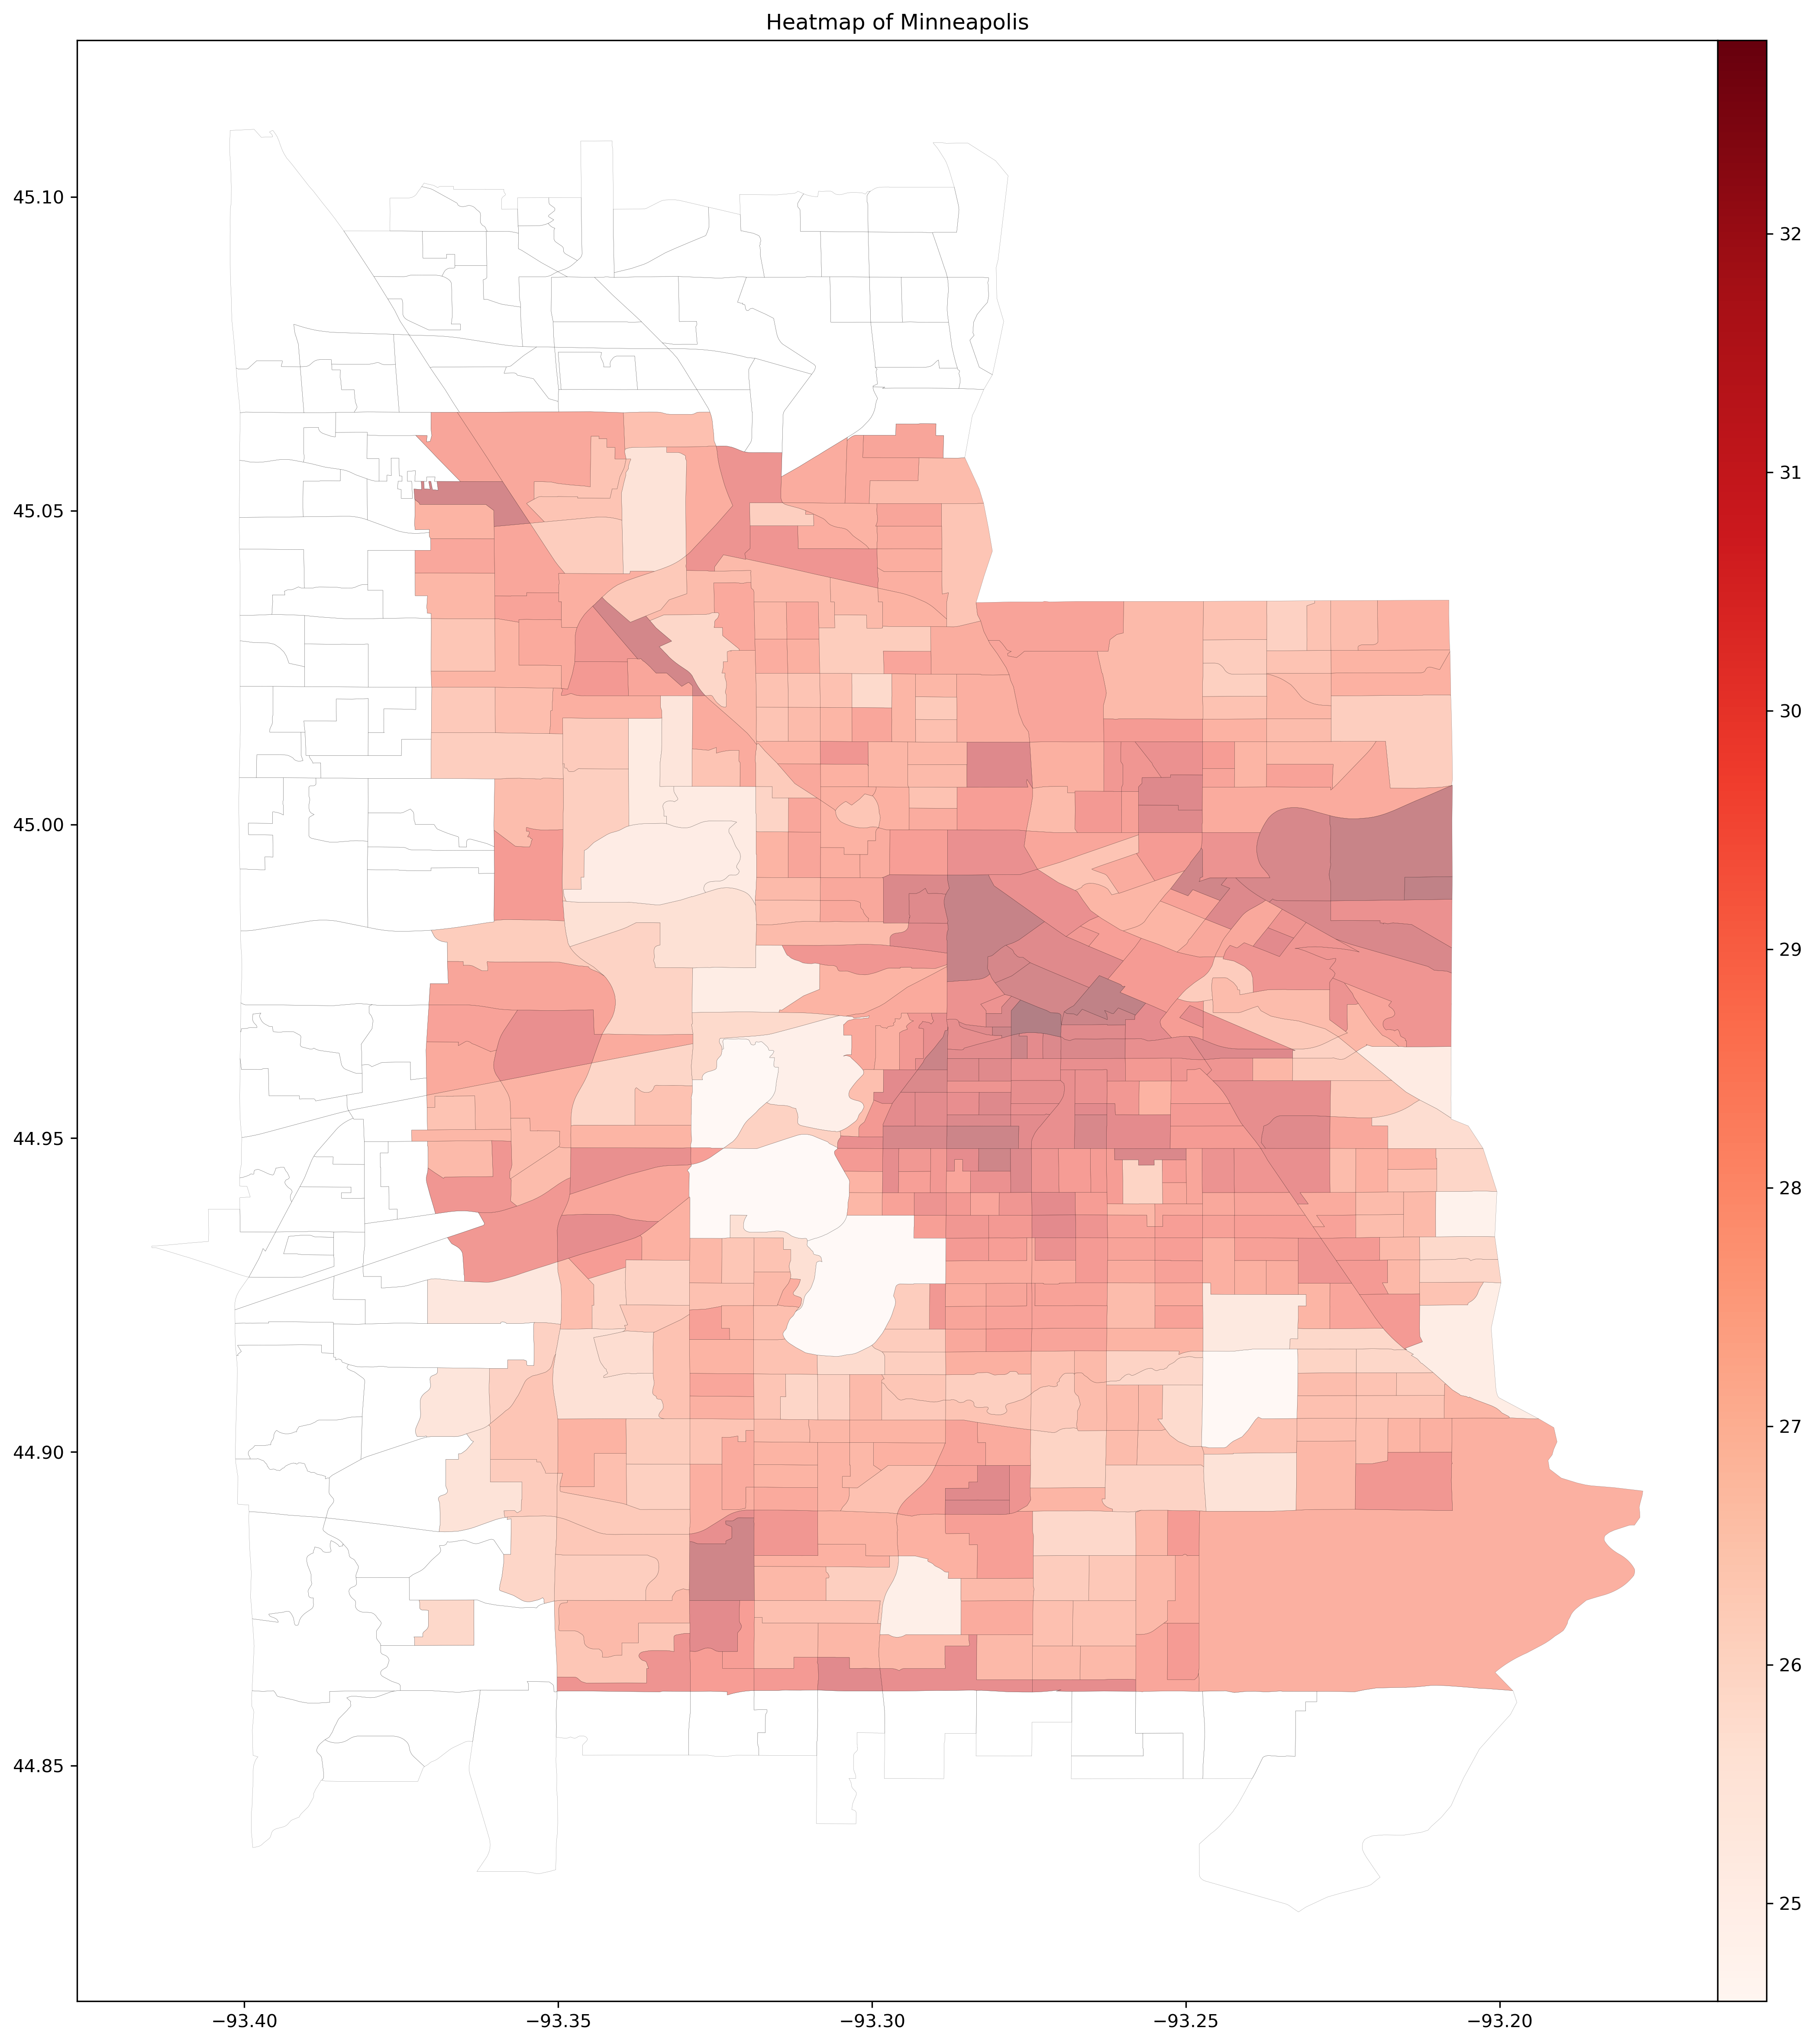

In [70]:
f,ax = plt.subplots(1,1, figsize=(20,20), sharex=True, sharey=True, dpi=300)
plt.title('Heatmap of Minneapolis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df4.plot('LST_means', ax=ax, alpha=0.5, cmap='Reds', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

C:\Users\wcoop\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\wcoop\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


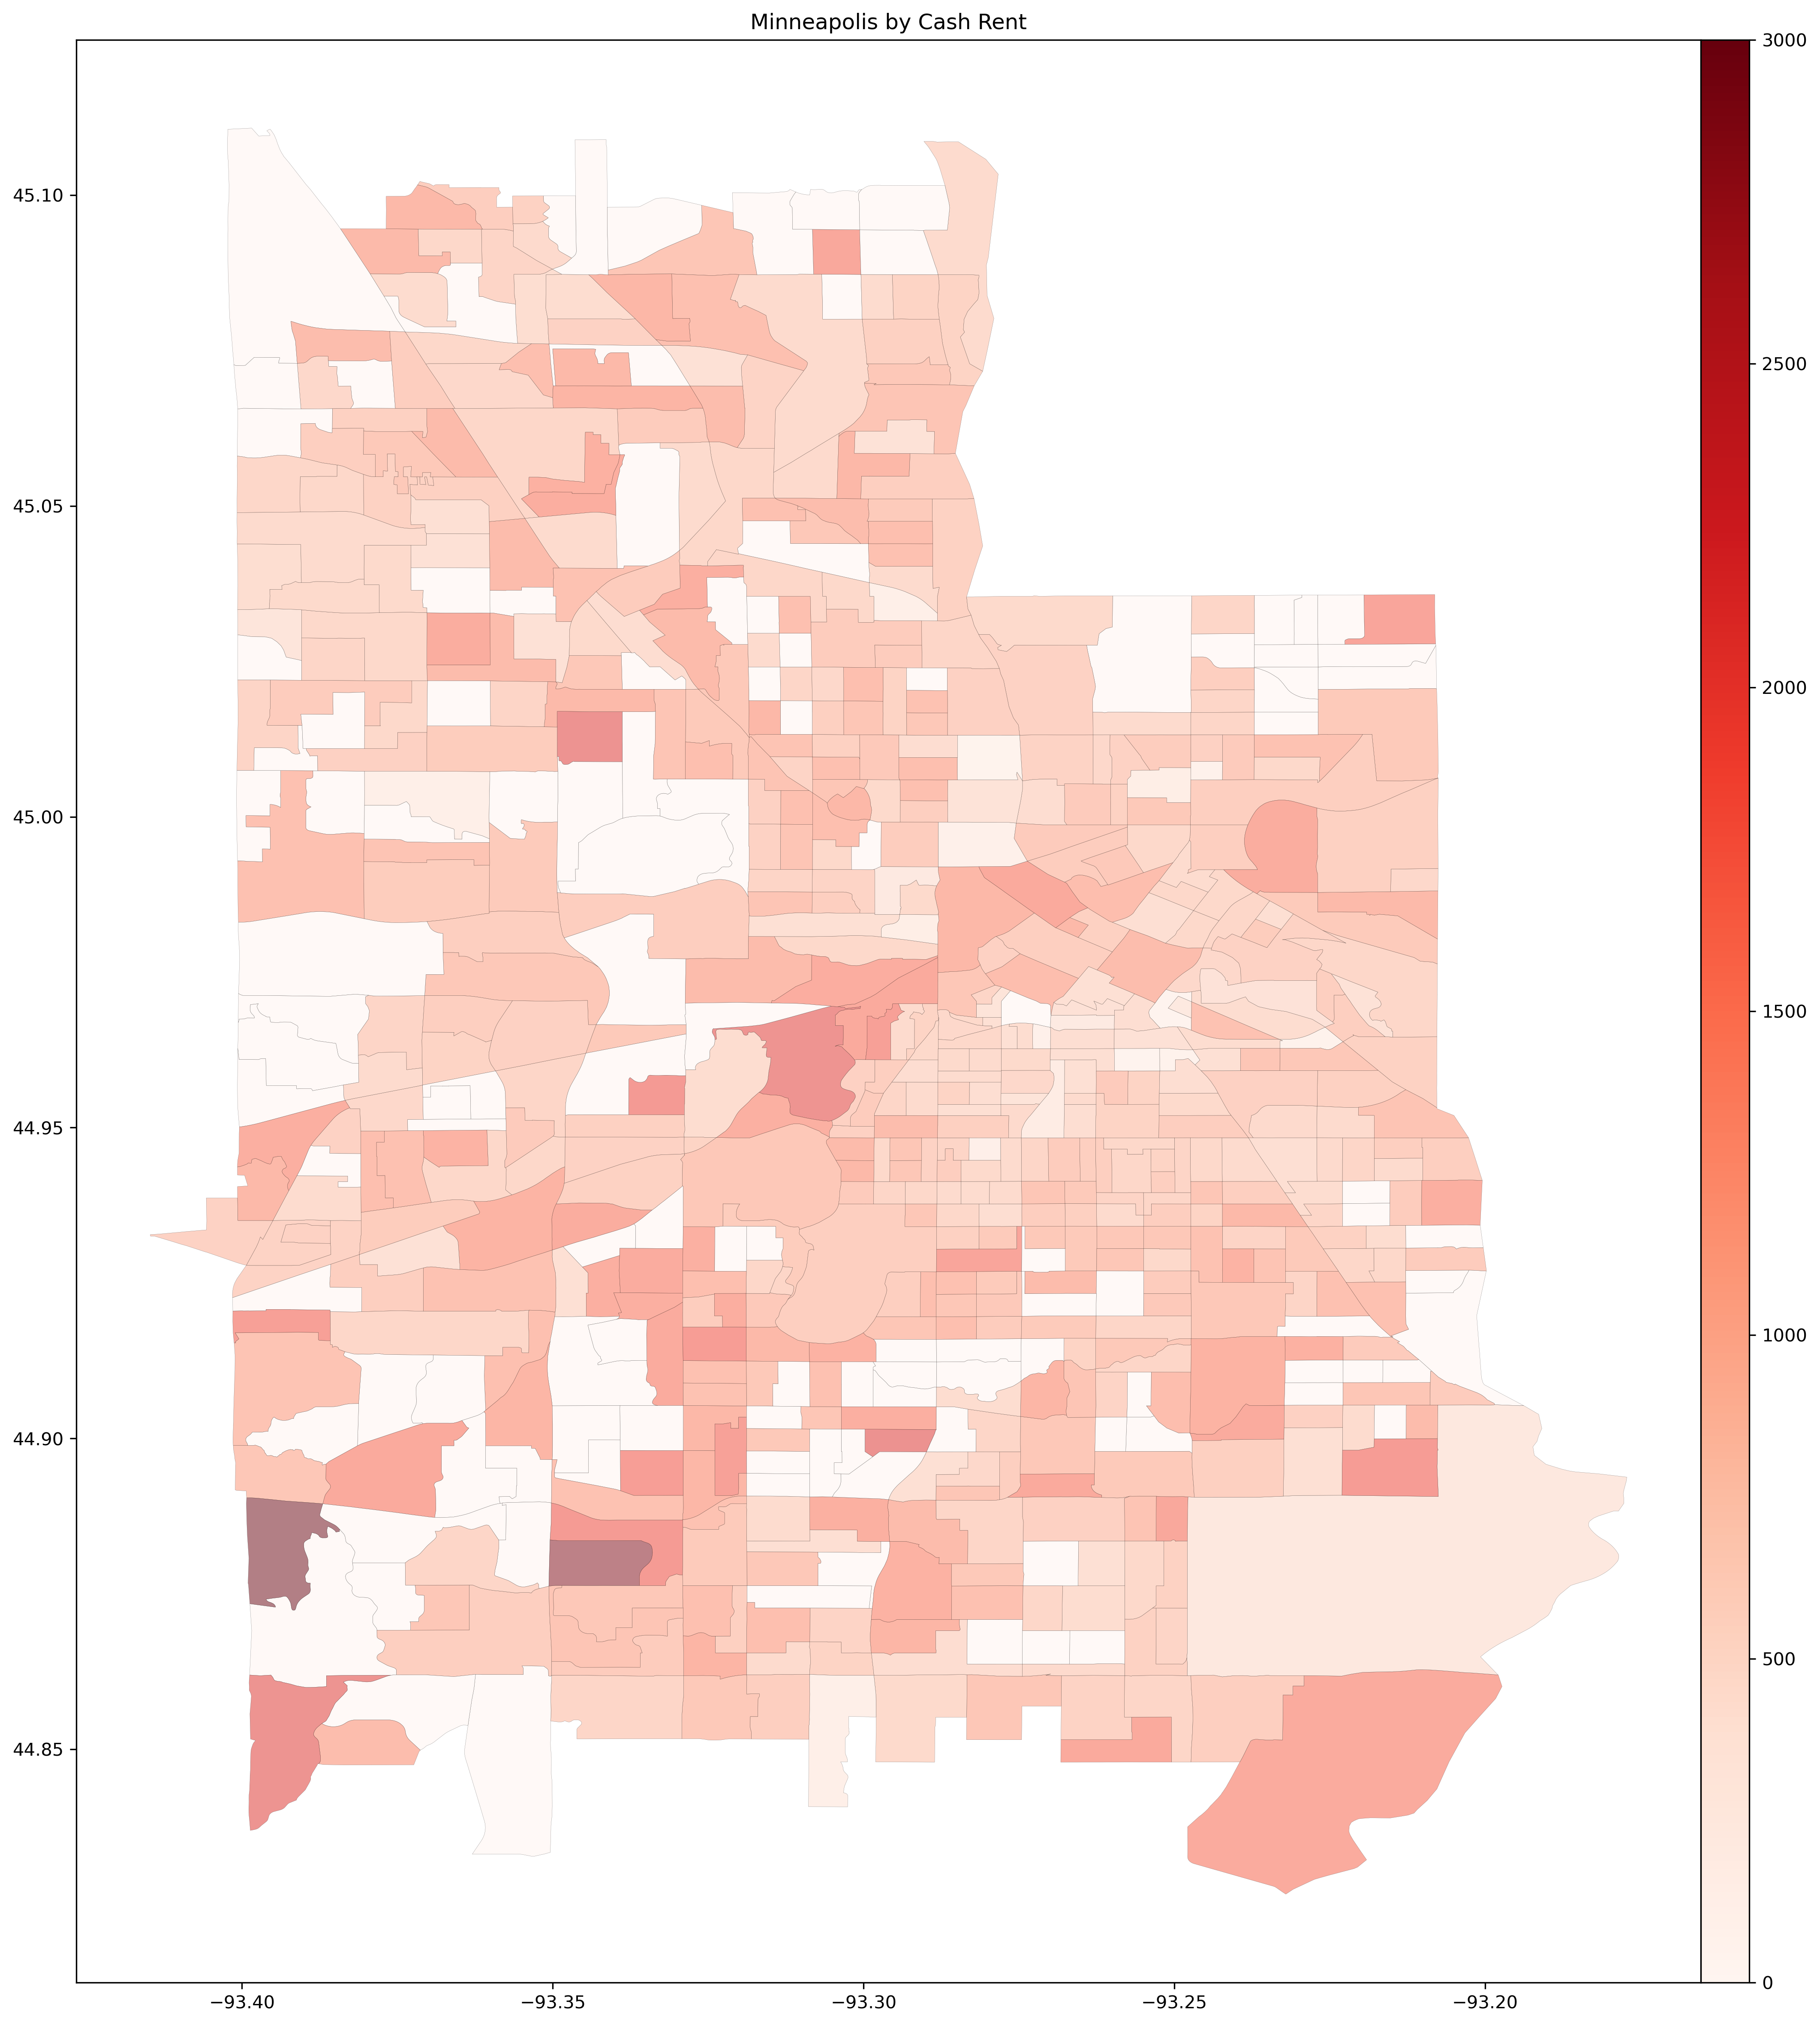

In [71]:
f,ax = plt.subplots(1,1, figsize=(20,20), sharex=True, sharey=True, dpi=300)
plt.title('Minneapolis by Cash Rent')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df4.plot('Cash_Rent', ax=ax, alpha=0.5, cmap='Reds', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

f,ax = plt.subplots(1,1, figsize=(20,20), sharex=True, sharey=True, dpi=300)
plt.title('Minneapolis by Owner Occupied Median House Value')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df4.plot('Median_Value__Owner_Occupied', ax=ax, alpha=0.5, cmap='Reds', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

C:\Users\wcoop\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\wcoop\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


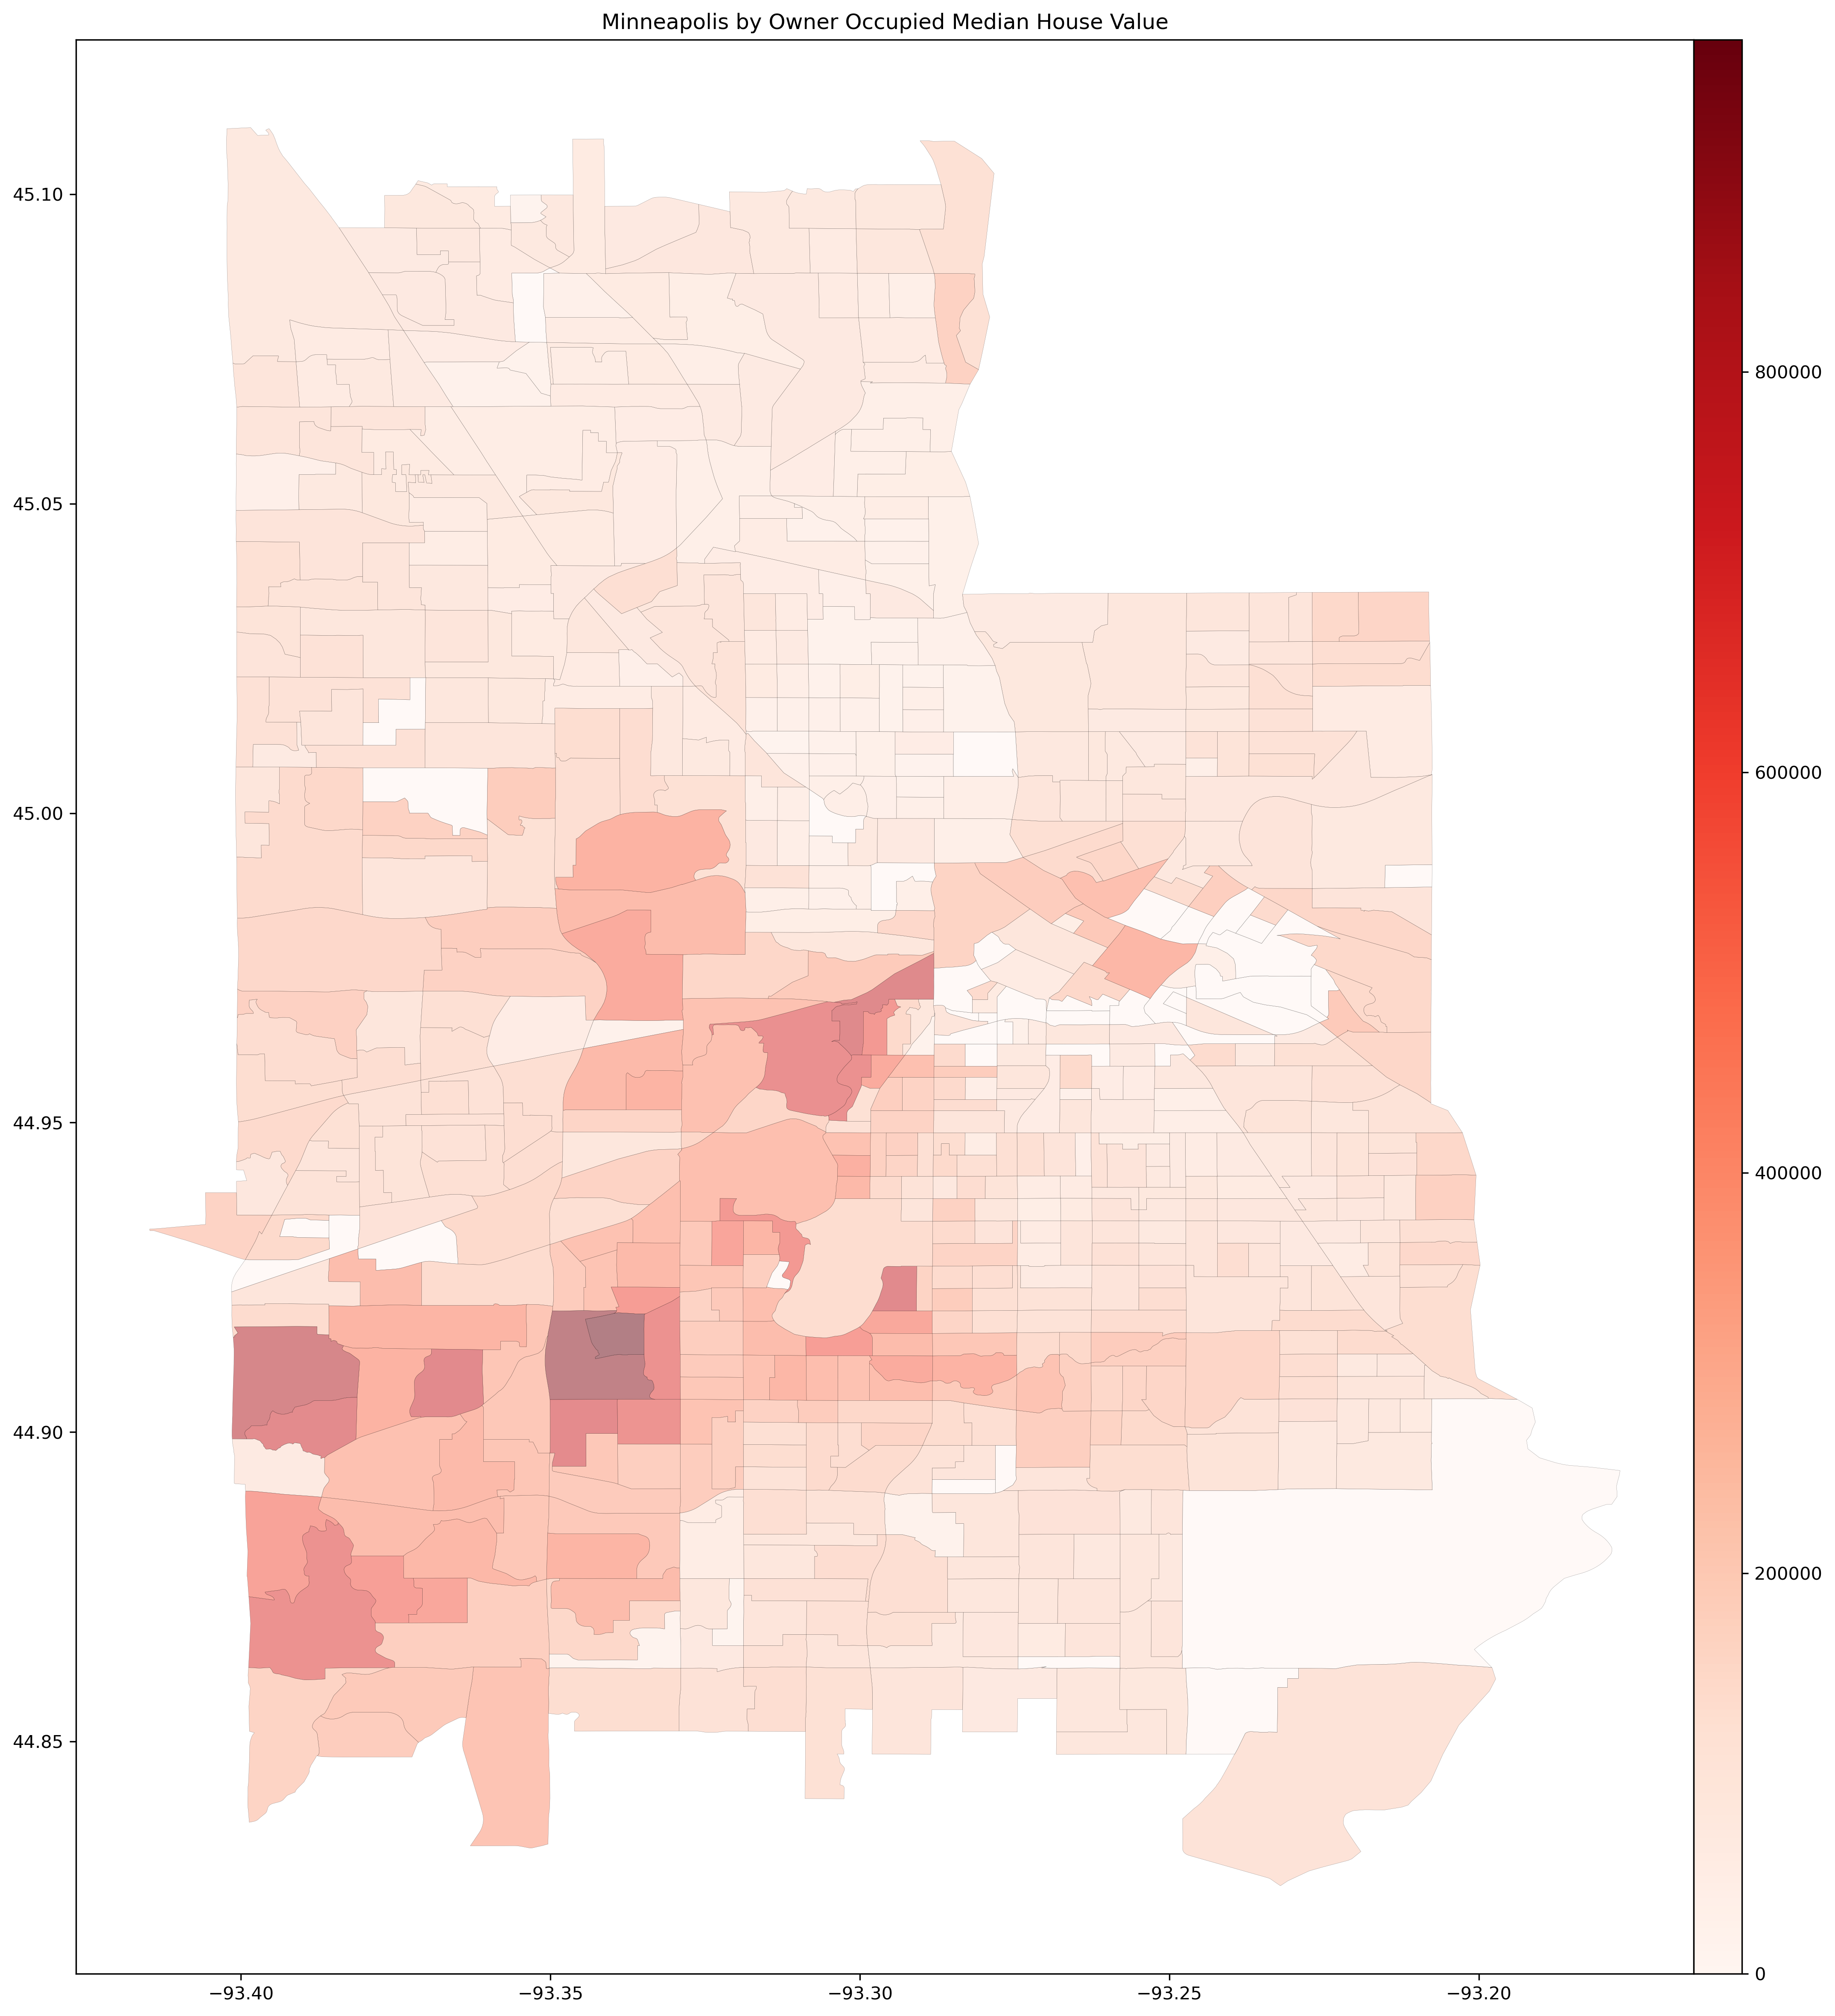

In [72]:
f,ax = plt.subplots(1,1, figsize=(20,20), sharex=True, sharey=True, dpi=300) 
plt.title('Minneapolis by Owner Occupied Median House Value') 
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df4.plot('Median_Value__Owner_Occupied', ax=ax, alpha=0.5, cmap='Reds', edgecolor='k', legend=True, cax=cax, linewidth=0.1) 
plt.show()

In [73]:
print(smf.ols('Median_Value__Owner_Occupied ~ LST_means', data = df4).fit().summary())

                                 OLS Regression Results                                 
Dep. Variable:     Median_Value__Owner_Occupied   R-squared:                       0.161
Model:                                      OLS   Adj. R-squared:                  0.160
Method:                           Least Squares   F-statistic:                     99.58
Date:                          Mon, 29 Nov 2021   Prob (F-statistic):           1.44e-21
Time:                                  18:23:55   Log-Likelihood:                -6832.3
No. Observations:                           520   AIC:                         1.367e+04
Df Residuals:                               518   BIC:                         1.368e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [74]:
print(smf.ols('Cash_Rent ~ LST_means', data = df4).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Cash_Rent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7751
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.379
Time:                        18:23:55   Log-Likelihood:                -3953.6
No. Observations:                 520   AIC:                             7911.
Df Residuals:                     518   BIC:                             7920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    471.0382    440.989      1.068      0.2

In [75]:
## Now let's estimate the trend at different quantiles: 
v = 0
df5 = df4.query(f'Cash_Rent != "{v}"')
qs = [0.1, 0.3, 0.5, 0.7, 0.9]
trends = np.zeros(len(qs))

fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
ax.scatter(df5["LST_means"], df5["Cash_Rent"],label='data',lw=0.5) # plot data

for iq in np.arange(len(qs)):
    model = smf.quantreg('Cash_Rent ~ LST_means', data=df5).fit(q=qs[iq])
    x = df5["LST_means"]
    print(model.summary())
    get_y = lambda a, b: a + b * df5.LST_means
    y = get_y(model.params['Intercept'], model.params['LST_means'])
    ax.plot(x, y,label=str(int(qs[iq]*100))+'th percentile fit')
    trends[iq] = model.params['LST_means']

ax.set_xlabel('Temperature', fontsize=14)
ax.set_ylabel('Cash Rent', fontsize=14)
plt.legend(fontsize=10)
plt.show()

# Question for discussion: how do the trends and their significance compare at different quantiles?
print('quantile trends:')
print(np.stack([qs,trends],axis=1))

                         QuantReg Regression Results                          
Dep. Variable:              Cash_Rent   Pseudo R-squared:              0.04213
Model:                       QuantReg   Bandwidth:                       130.7
Method:                 Least Squares   Sparsity:                        1252.
Date:                Mon, 29 Nov 2021   No. Observations:                  433
Time:                        18:23:55   Df Residuals:                      431
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2429.5481    388.032      6.261      0.000    1666.877    3192.219
LST_means    -58.4922     13.293     -4.400      0.000     -84.620     -32.364
                         QuantReg Regression Results                          
Dep. Variable:              Cash_Rent   Pseudo R-squ

quantile trends:
[[ 1.00000000e-01 -5.84922362e+01]
 [ 3.00000000e-01 -6.05196258e+01]
 [ 5.00000000e-01 -7.93545025e+01]
 [ 7.00000000e-01 -8.75899159e+01]
 [ 9.00000000e-01 -1.22399322e+02]]


                              QuantReg Regression Results                               
Dep. Variable:     Median_Value__Owner_Occupied   Pseudo R-squared:             0.001927
Model:                                 QuantReg   Bandwidth:                   4.192e+04
Method:                           Least Squares   Sparsity:                    2.741e+05
Date:                          Mon, 29 Nov 2021   No. Observations:                  487
Time:                                  18:23:56   Df Residuals:                      485
                                                  Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.136e+05   5.88e+04      3.633      0.000    9.81e+04    3.29e+05
LST_means  -3097.4836   2033.704     -1.523      0.128   -7093.441     898.474
                              QuantReg Regression Results    

C:\Users\wcoop\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:186: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)



                              QuantReg Regression Results                               
Dep. Variable:     Median_Value__Owner_Occupied   Pseudo R-squared:               0.1223
Model:                                 QuantReg   Bandwidth:                   5.649e+04
Method:                           Least Squares   Sparsity:                    9.565e+05
Date:                          Mon, 29 Nov 2021   No. Observations:                  487
Time:                                  18:23:56   Df Residuals:                      485
                                                  Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.069e+06   3.43e+05      6.024      0.000    1.39e+06    2.74e+06
LST_means  -5.875e+04   1.19e+04     -4.939      0.000   -8.21e+04   -3.54e+04


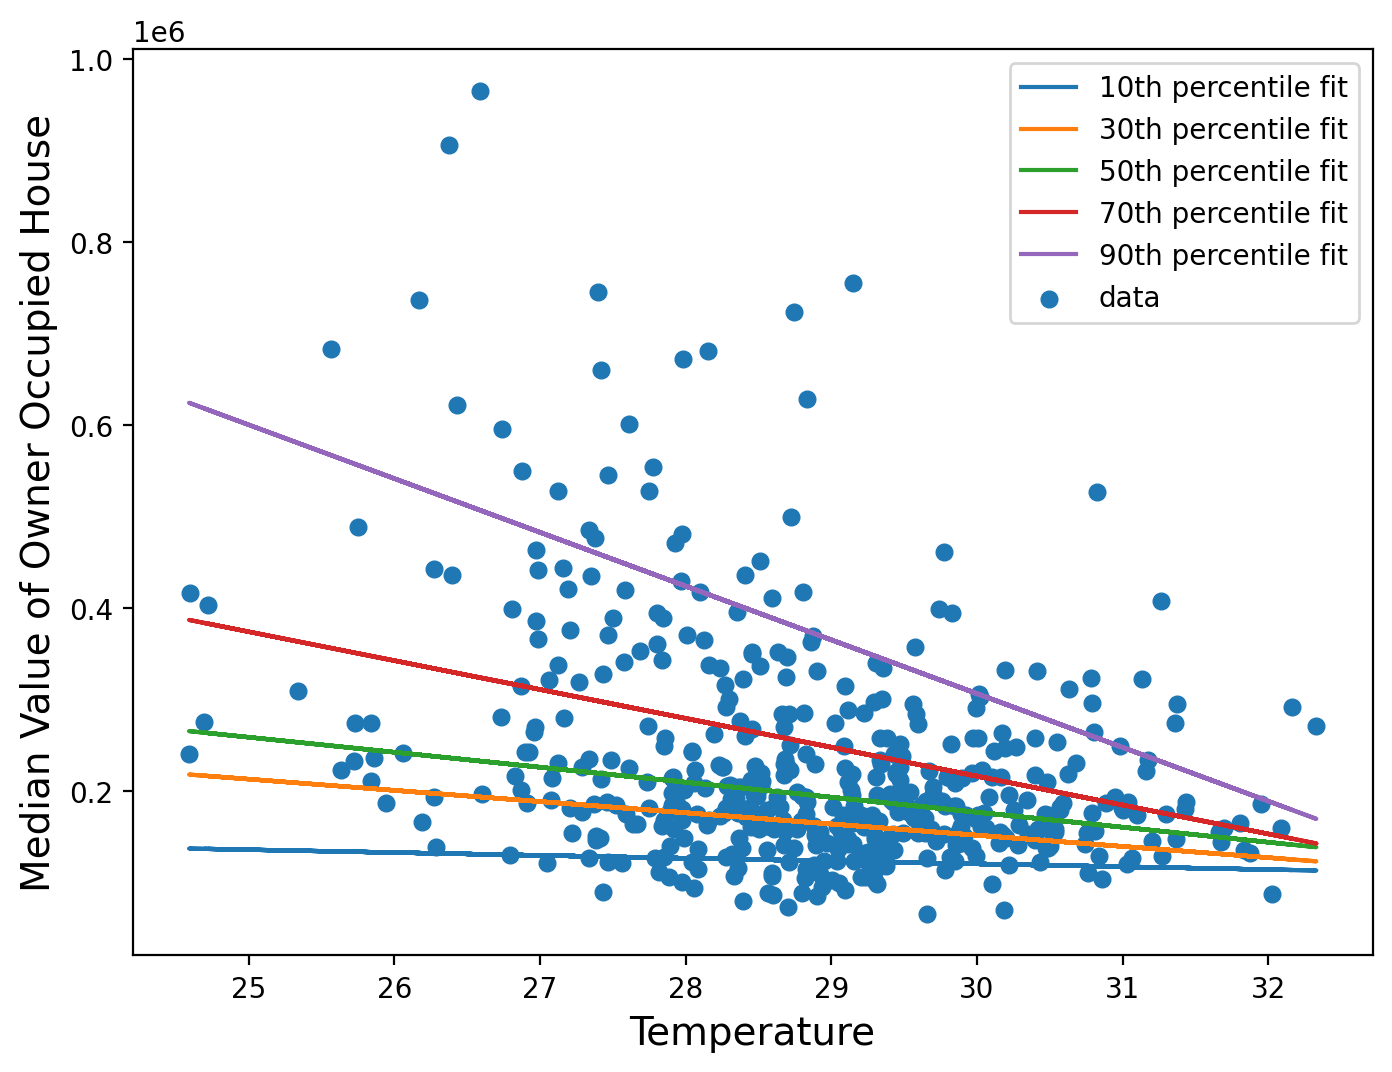

quantile trends:
[[ 1.00000000e-01 -3.09748364e+03]
 [ 3.00000000e-01 -1.22520536e+04]
 [ 5.00000000e-01 -1.63882111e+04]
 [ 7.00000000e-01 -3.15602371e+04]
 [ 9.00000000e-01 -5.87455913e+04]]


In [76]:
## Now let's estimate the trend at different quantiles: 
v = 0
df5 = df4.query(f'Median_Value__Owner_Occupied != "{v}"')
qs = [0.1, 0.3, 0.5, 0.7, 0.9]
trends = np.zeros(len(qs))

fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
ax.scatter(df5["LST_means"], df5["Median_Value__Owner_Occupied"],label='data',lw=0.5) # plot data

for iq in np.arange(len(qs)):
    model = smf.quantreg('Median_Value__Owner_Occupied ~ LST_means', data=df5).fit(q=qs[iq])
    x = df5["LST_means"]
    print(model.summary())
    get_y = lambda a, b: a + b * df5.LST_means
    y = get_y(model.params['Intercept'], model.params['LST_means'])
    ax.plot(x, y,label=str(int(qs[iq]*100))+'th percentile fit')
    trends[iq] = model.params['LST_means']

ax.set_xlabel('Temperature', fontsize=14)
ax.set_ylabel('Median Value of Owner Occupied House', fontsize=14)
plt.legend(fontsize=10)
plt.show()

# Question for discussion: how do the trends and their significance compare at different quantiles?
print('quantile trends:')
print(np.stack([qs,trends],axis=1))

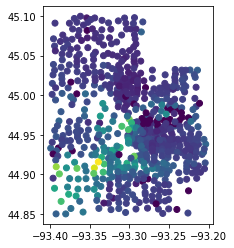

In [77]:
from shapely.geometry import Point

df6 = df4

df6["INTPTLAT"] = df6["INTPTLAT"].astype(float)
df6["INTPTLON"] = df6["INTPTLON"].astype(float)


geometry = [Point(xy) for xy in zip(df6.iloc[:, 11], df6.iloc[:, 10])]

gdf = geopandas.GeoDataFrame(df6, geometry=geometry)

gdf.plot(column='Median_Value__Owner_Occupied')


plt.savefig('raster.tiff')